In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv(r"C:\Users\mrahu\Downloads\dataset(G).csv",encoding = "latin-1")

# Initial Data Inspection
print("## First 5 Rows of the Dataset:")
print(df.head())
print("=======================================================================================")

print("\n## Dataset Information:")
df.info()
print("=======================================================================================")
print("\n## Missing Values:")
print(df.isnull().sum())

print("\n## Duplicate Rows:")
print(f"Number of duplicate rows: {df.duplicated().sum()}")

## First 5 Rows of the Dataset:
  CustomerID Gender  Age Country      Plan ContractType  AutoRenew  \
0     C00001      M   39      UK  Standard    Quarterly          1   
1     C00002      F   19     USA  Standard      Monthly          1   
2     C00003      M   21   India     Basic      Monthly          1   
3     C00004      M   62   India  Standard      Monthly          1   
4     C00005      M   30     USA  Standard    Quarterly          1   

   TenureMonths  MonthlyCharges  Upgrades  ...  ActiveDaysLastMonth  \
0         60.56          162.79         0  ...                   19   
1         35.74          124.70         1  ...                   11   
2          2.37          111.67         1  ...                    7   
3         42.01          173.96         0  ...                   15   
4         50.64          182.96         0  ...                   16   

   LastLoginDaysAgo  UsageTrend3m_Hours  AvgMonthlyUsageHours  \
0                15                 9.6                

In [2]:
df.describe()

,Age,AutoRenew,TenureMonths,MonthlyCharges,Upgrades,Downgrades,IsPromoEligible,LoginsLast30d,SessionsPerUserLastMonth,ActiveDaysLastMonth,LastLoginDaysAgo,UsageTrend3m_Hours,AvgMonthlyUsageHours,SupportTicketsPerMonth,NPS,PaymentDelayDays,FailedPayments_12m,TotalSpend,Churn
count,20000.00000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,43.52910,0.753550,30.467451,104.481852,0.60165,0.398400,0.351550,20.420950,4.987645,19.323450,20.656150,99.267190,82.974712,1.499900,12.487200,2.414950,1.191600,3169.161725,0.300000
std,14.96466,0.430954,18.064039,54.893017,0.77743,0.635923,0.477466,5.257274,2.886251,6.565842,13.771961,57.750928,57.827403,1.229543,34.498822,1.481545,1.097702,2740.179134,0.458269
min,18.00000,0.000000,1.000000,10.000000,0.00000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-100.000000,0.000000,0.000000,9.420000,0.000000
25%,31.00000,1.000000,15.027500,57.050000,0.00000,0.000000,0.000000,17.000000,2.500000,15.000000,10.000000,49.200000,34.390000,1.000000,-10.000000,1.000000,0.000000,974.535000,0.000000
50%,43.00000,1.000000,30.205000,103.760000,0.00000,0.000000,0.000000,20.000000,5.000000,19.000000,20.000000,99.300000,69.795000,1.000000,12.000000,2.000000,1.000000,2375.390000,0.000000
75%,57.00000,1.000000,45.380000,151.500000,1.00000,1.000000,1.000000,24.000000,7.500000,24.000000,30.000000,149.400000,128.992500,2.000000,36.000000,3.000000,2.000000,4686.482500,1.000000
max,69.00000,1.000000,83.220000,199.990000,5.00000,4.000000,1.000000,44.000000,10.000000,30.000000,89.000000,200.000000,207.970000,8.000000,100.000000,10.000000,8.000000,15155.040000,1.000000


In [3]:
# Rescale NPS to 1–10
df['NPS'] = pd.qcut(df['NPS'], q=10, labels=range(1,11)).astype(int)

# Univariate Analysis

Text(0, 0.5, 'Count')

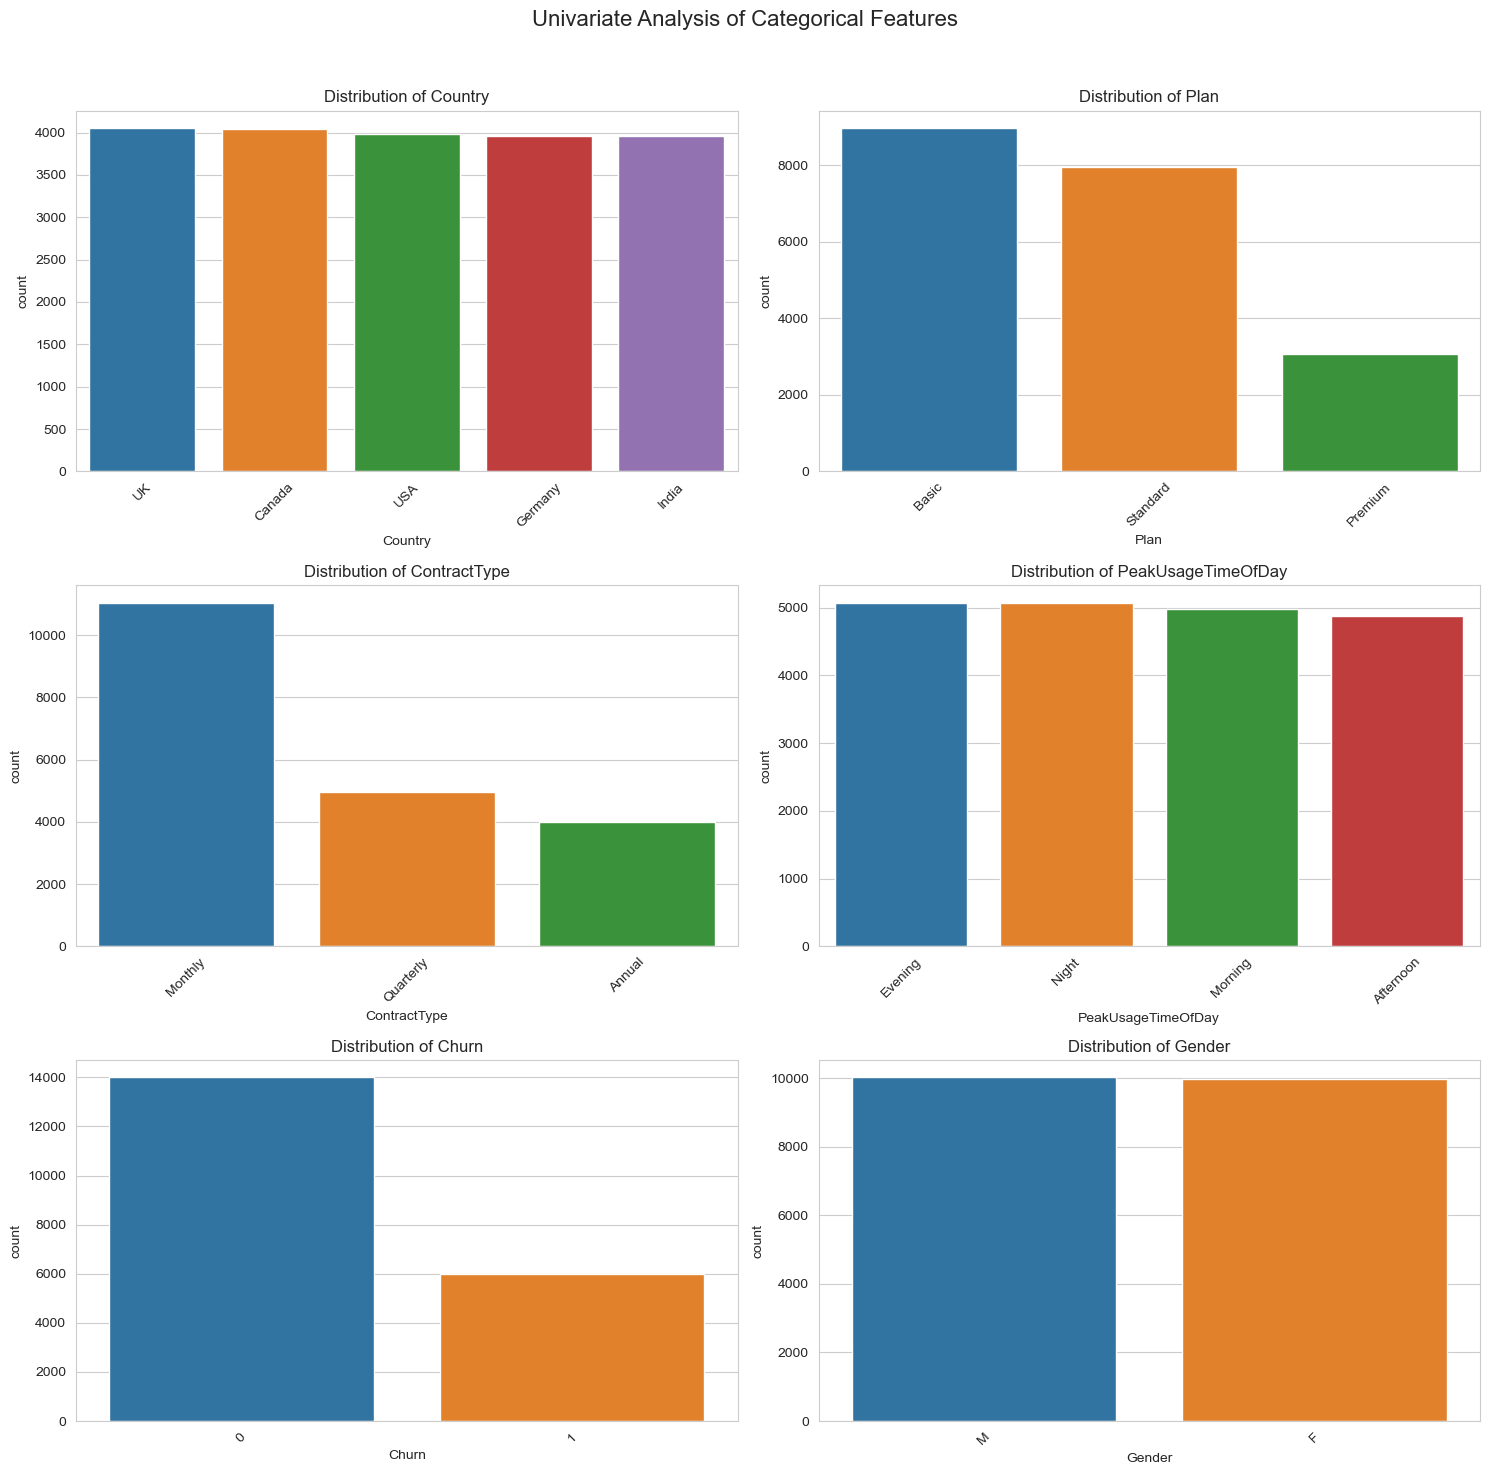

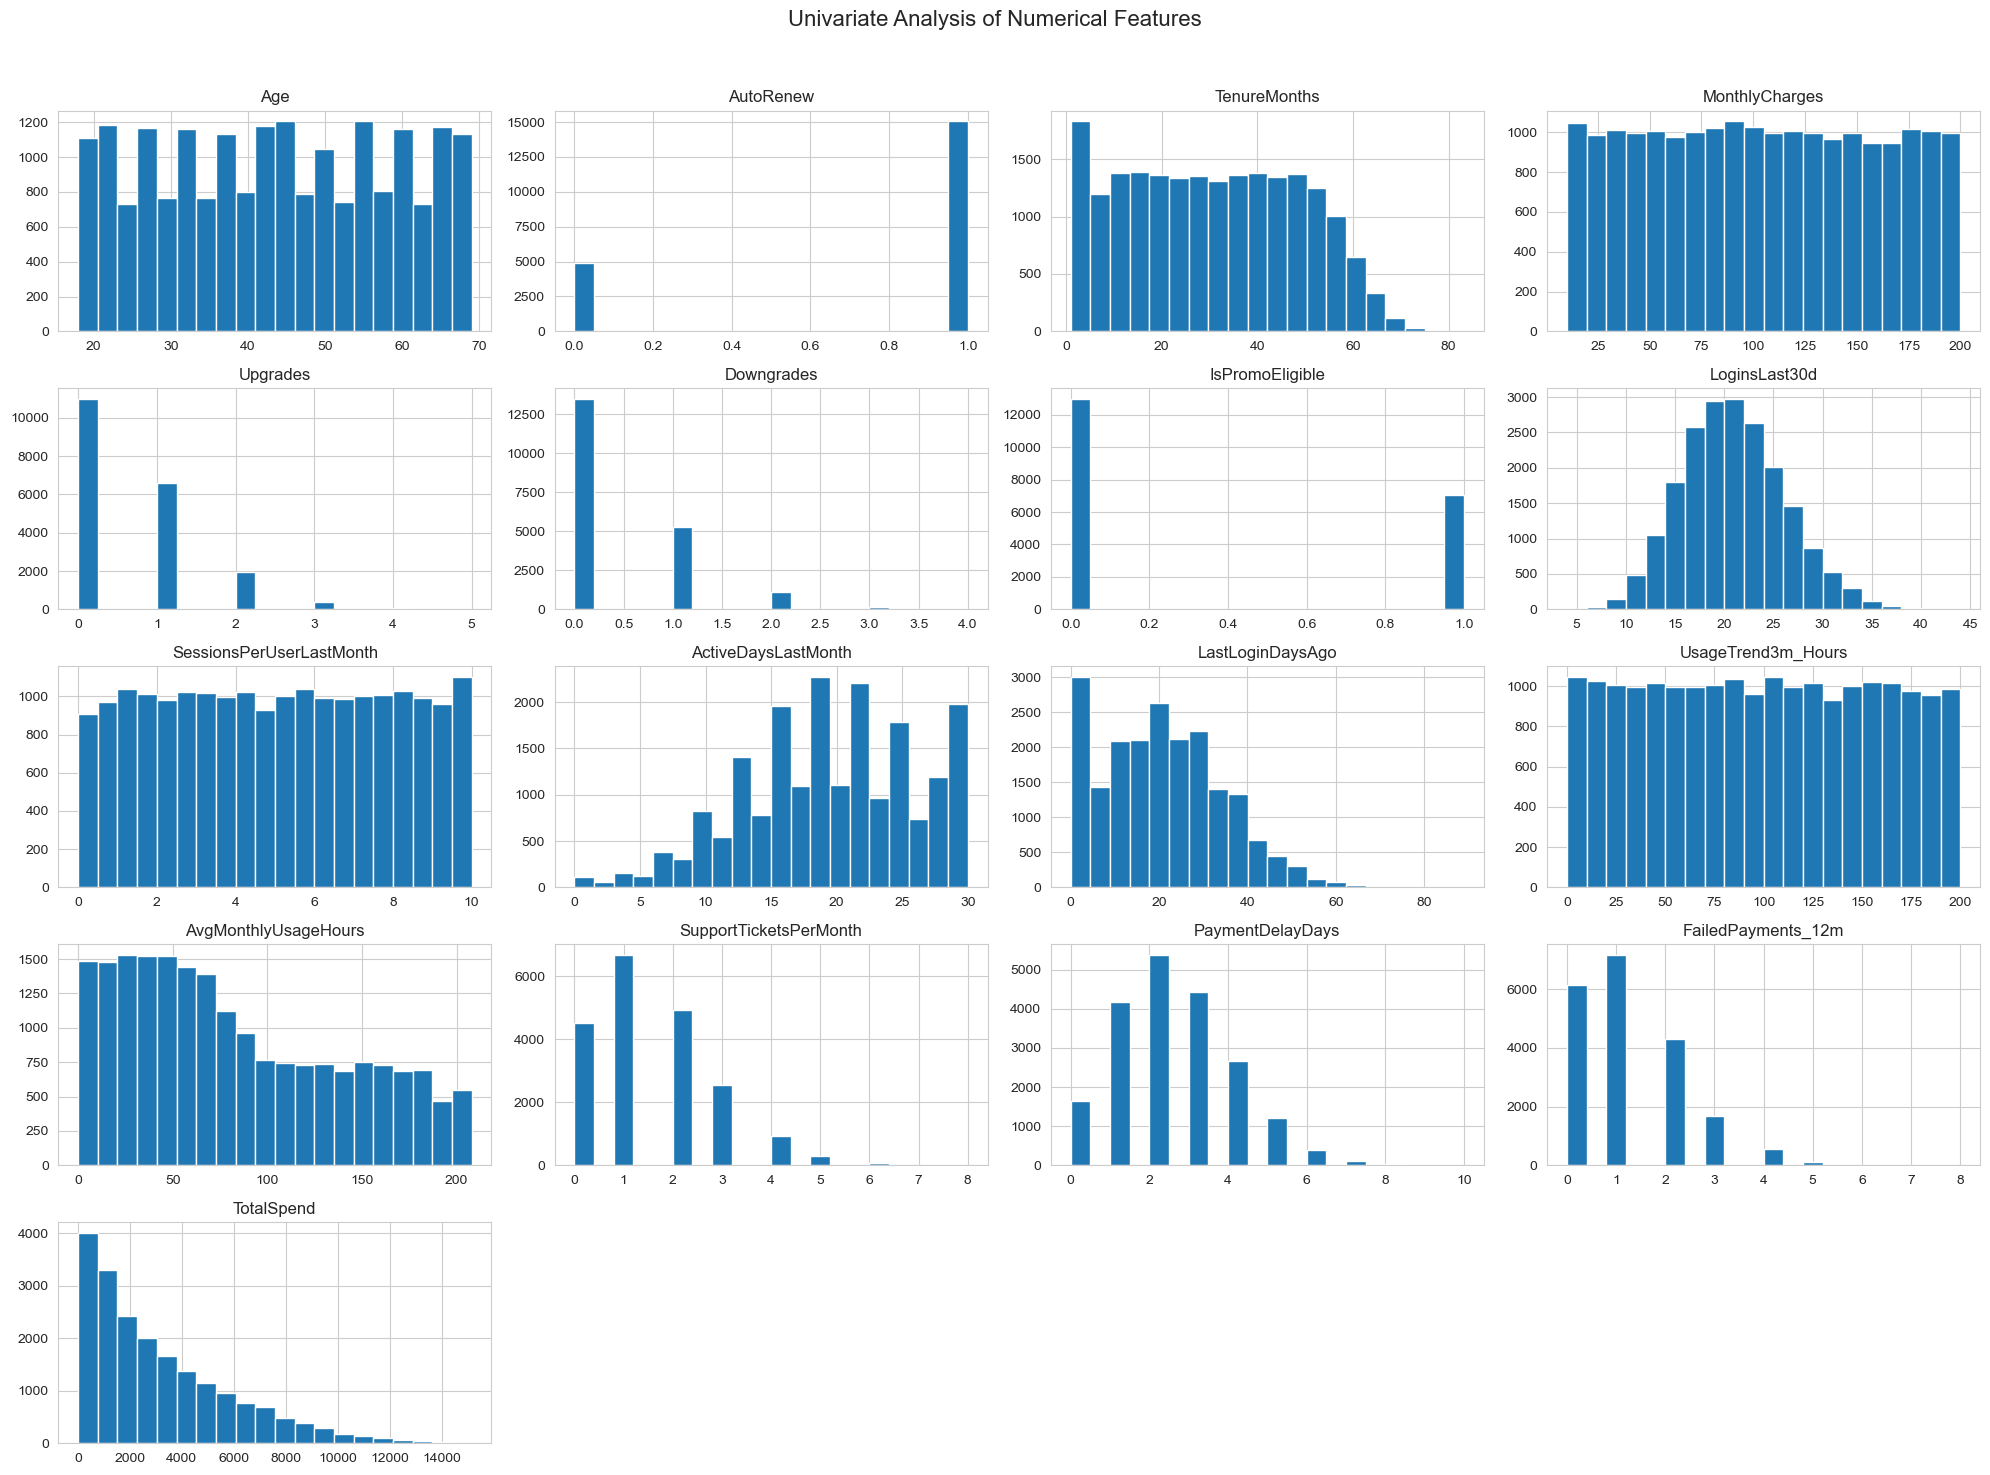

In [4]:
# Set the style for the plots
sns.set_style("whitegrid")

# Univariate Analysis of Categorical Features
categorical_features = ['Country', 'Plan', 'ContractType', 'PeakUsageTimeOfDay', 'Churn','Gender']
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('Univariate Analysis of Categorical Features', fontsize=16)

for i, feature in enumerate(categorical_features):
    row = i // 2
    col = i % 2
    sns.countplot(x=feature, data=df, ax=axes[row, col], order = df[feature].value_counts().index)
    axes[row, col].set_title(f'Distribution of {feature}')
    axes[row, col].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('categorical_distributions.png')

# Univariate Analysis of Numerical Features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.drop('Churn')
df[numerical_features].hist(bins=20, figsize=(20, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.ylabel("Count")

# Bivaraiate Analysis

## Multivariate Analysis

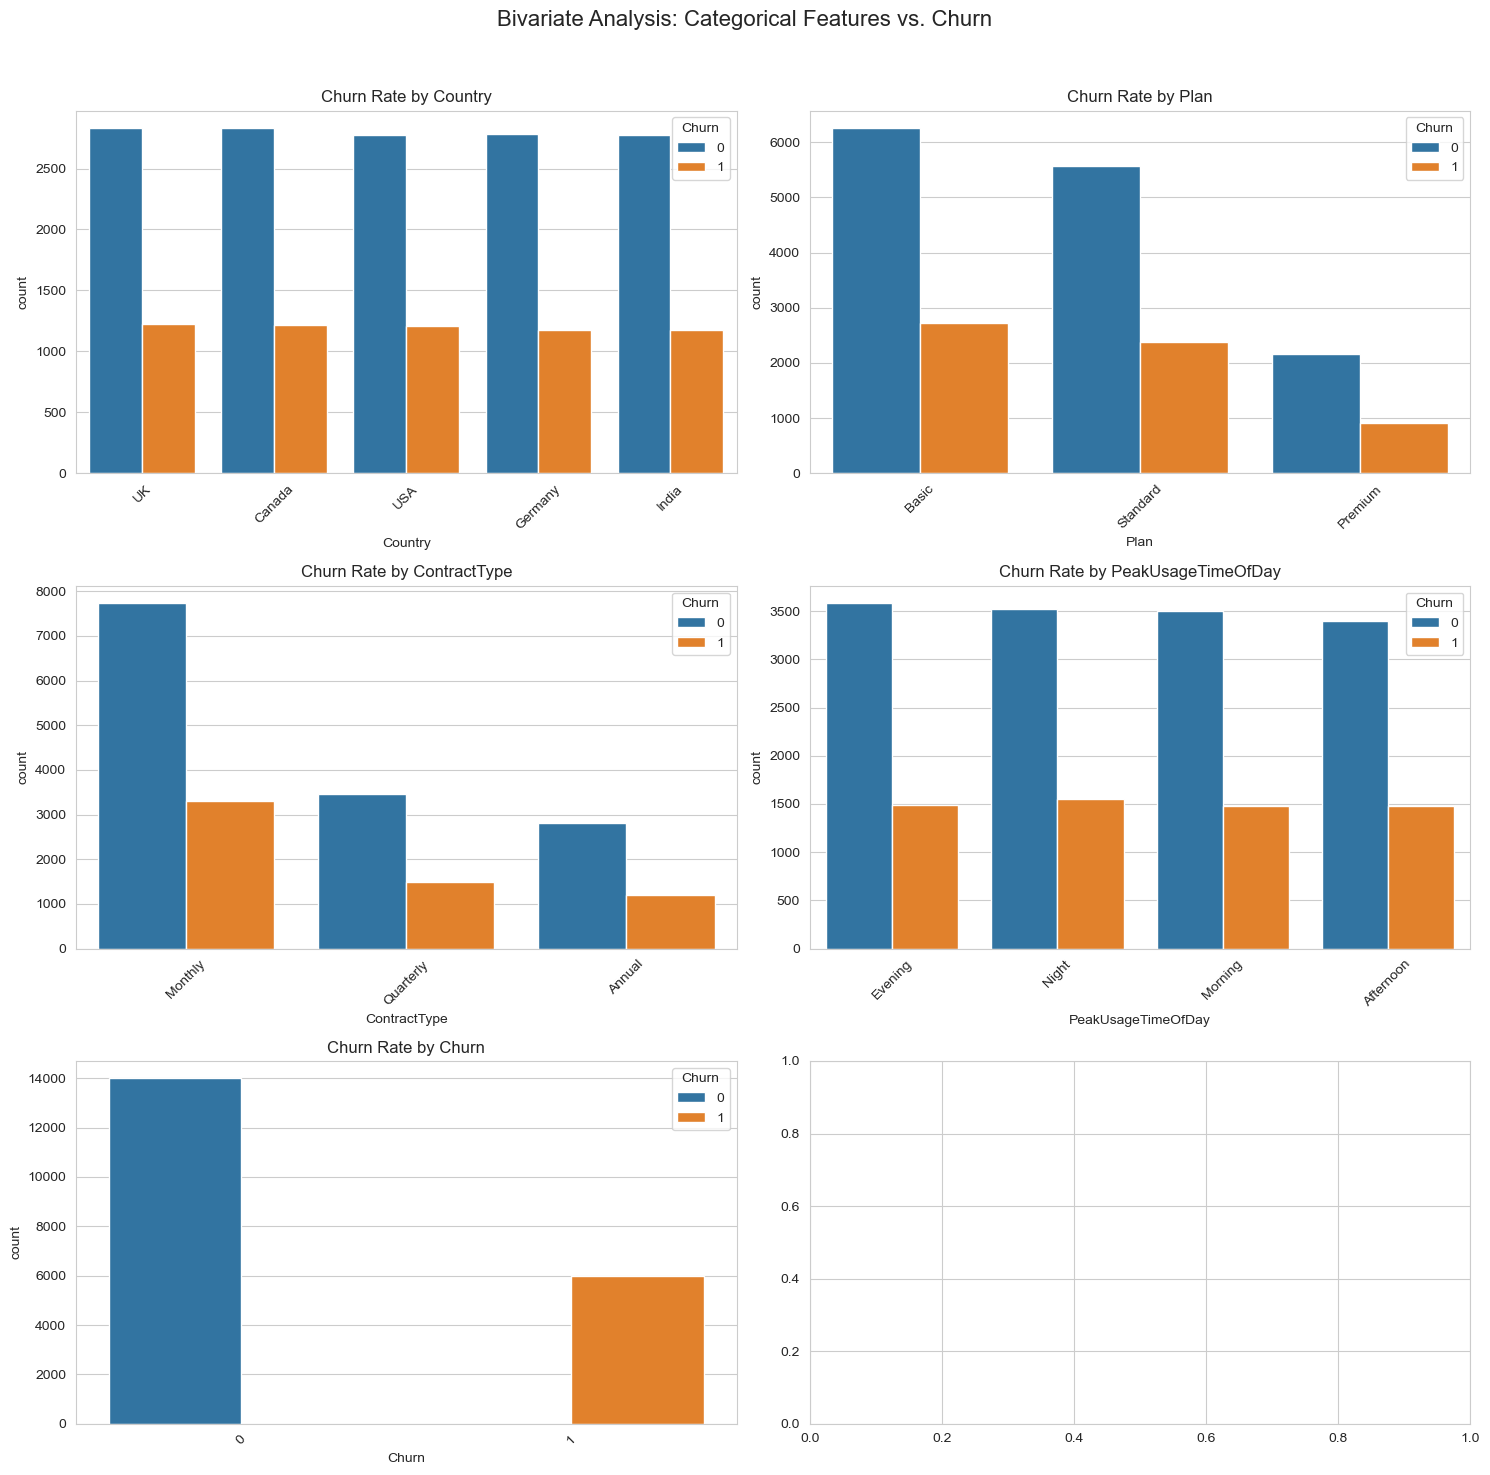

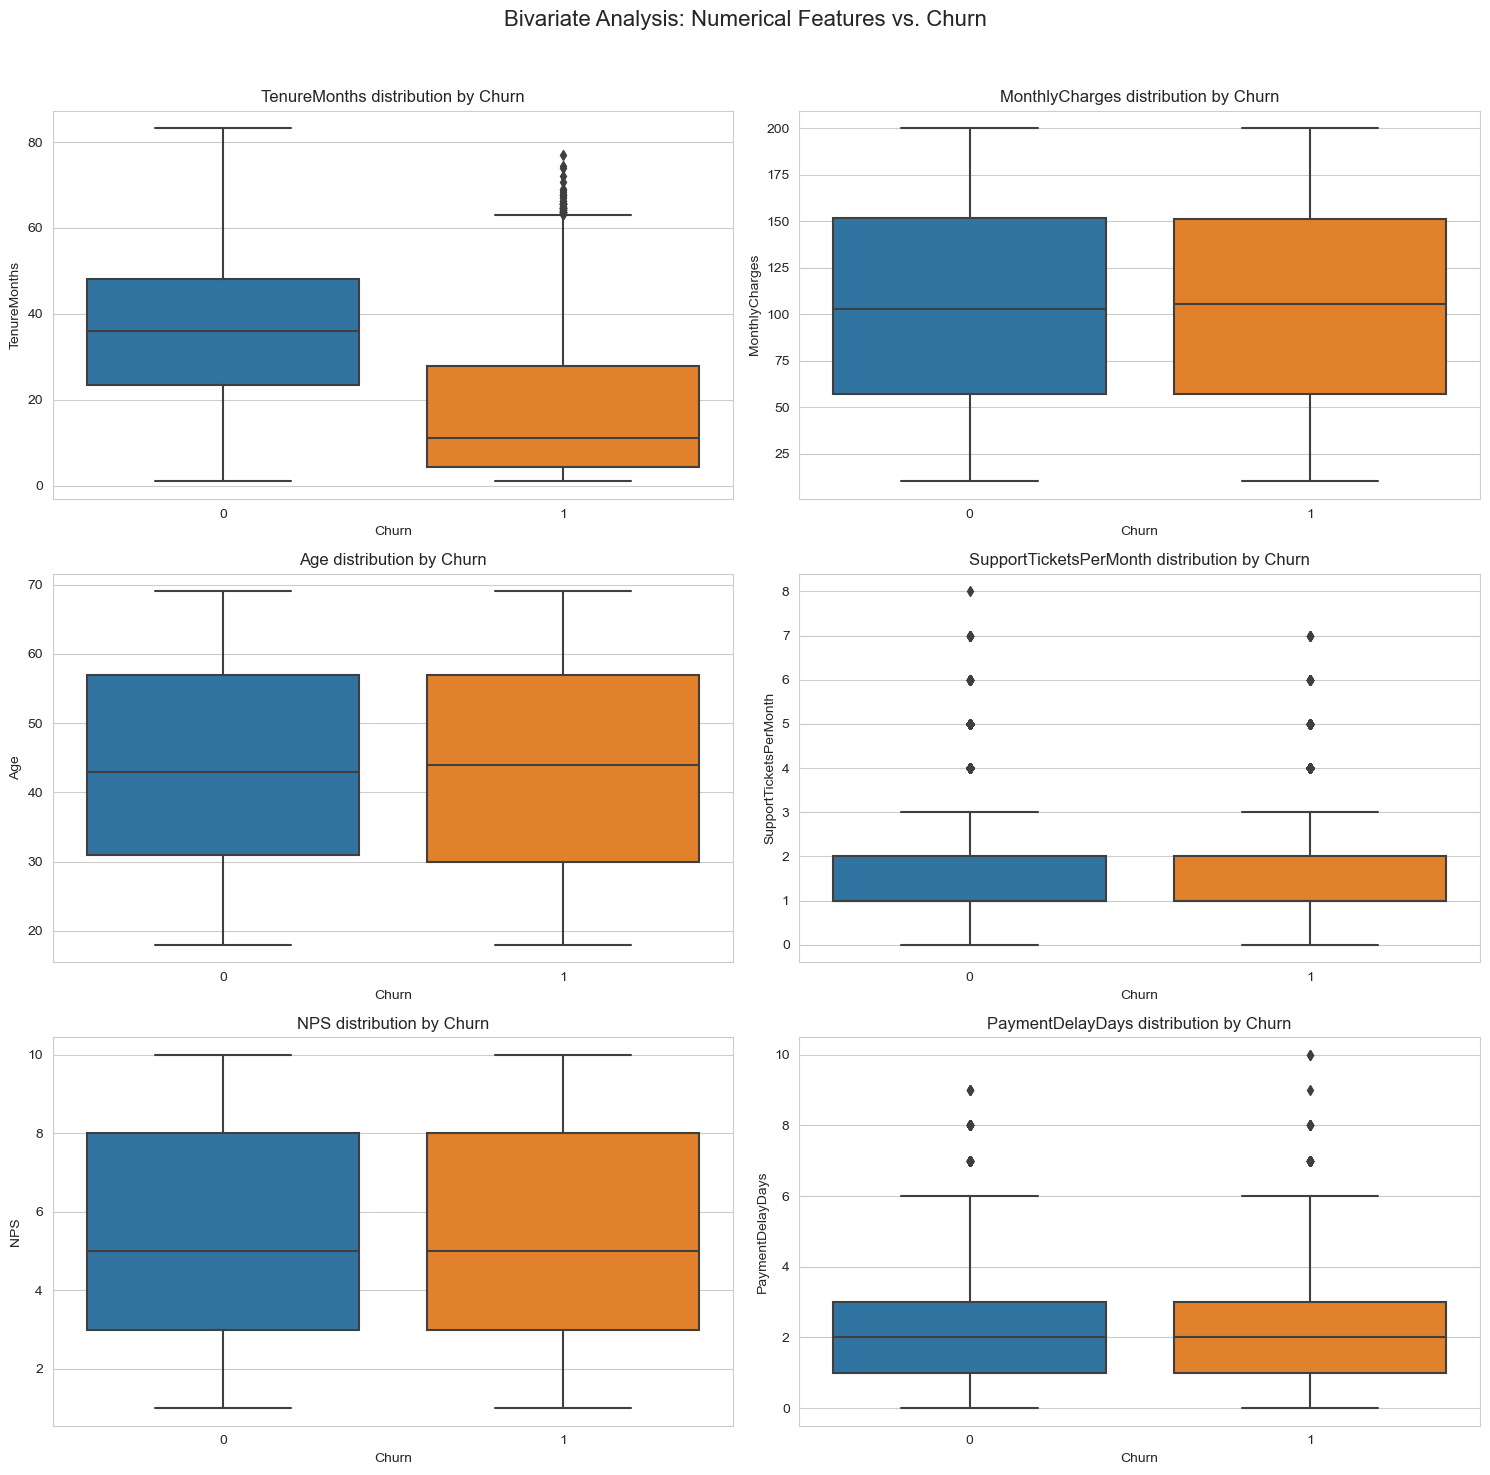

In [5]:
# Bivariate Analysis: Categorical Features vs. Churn
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('Bivariate Analysis: Categorical Features vs. Churn', fontsize=16)

for i, feature in enumerate(categorical_features[:-1]): # Exclude 'Churn' itself
    row = i // 2
    col = i % 2
    sns.countplot(x=feature, hue='Churn', data=df, ax=axes[row, col], order = df[feature].value_counts().index)
    axes[row, col].set_title(f'Churn Rate by {feature}')
    axes[row, col].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('categorical_vs_churn.png')

# Bivariate Analysis: Numerical Features vs. Churn
# Select a subset of numerical features for box plots for better visualization
selected_numerical_features = ['TenureMonths', 'MonthlyCharges', 'Age', 'SupportTicketsPerMonth', 'NPS', 'PaymentDelayDays']
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('Bivariate Analysis: Numerical Features vs. Churn', fontsize=16)

for i, feature in enumerate(selected_numerical_features):
    row = i // 2
    col = i % 2
    sns.boxplot(x='Churn', y=feature, data=df, ax=axes[row, col])
    axes[row, col].set_title(f'{feature} distribution by Churn')
    

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('numerical_vs_churn.png')

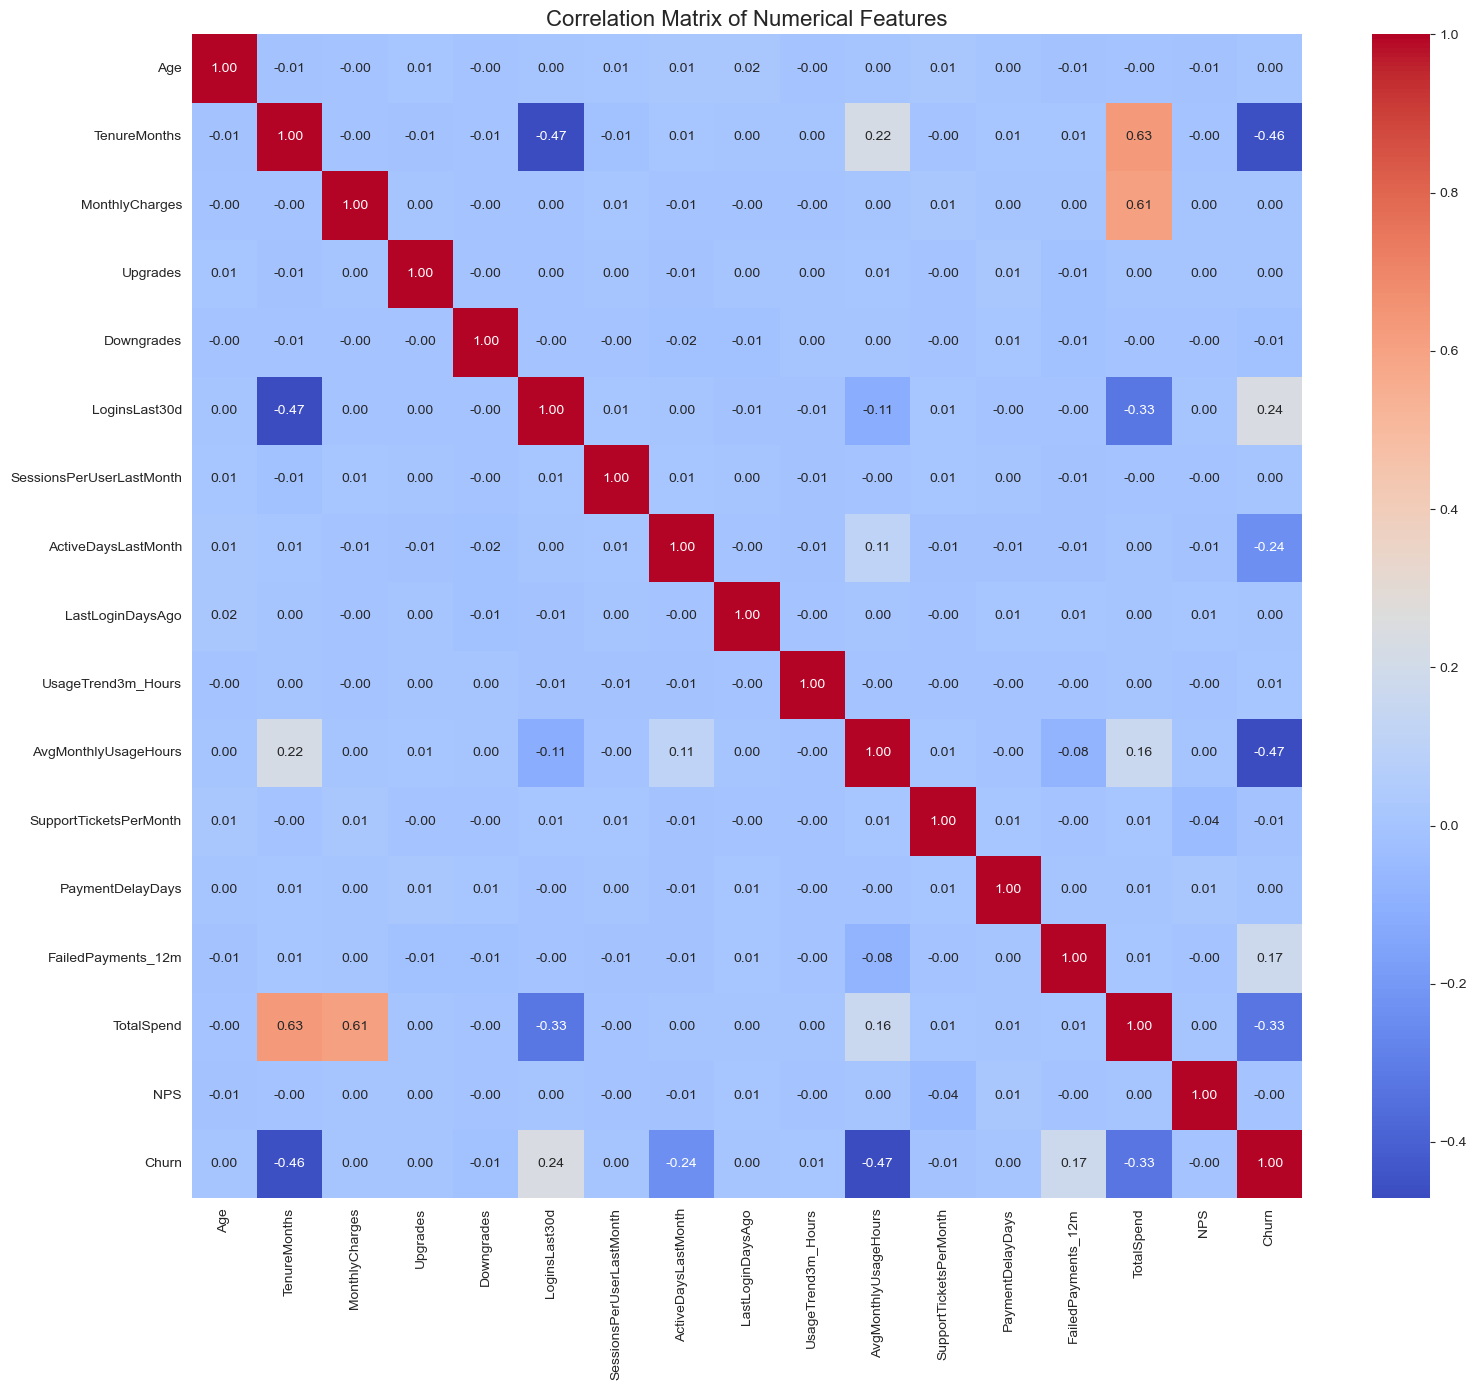

In [6]:
# Multivariate Analysis: Correlation Matrix
numerical_cols = ['Age', 'TenureMonths', 'MonthlyCharges', 'Upgrades', 'Downgrades', 
                  'LoginsLast30d', 'SessionsPerUserLastMonth', 'ActiveDaysLastMonth', 
                  'LastLoginDaysAgo', 'UsageTrend3m_Hours', 'AvgMonthlyUsageHours', 
                  'SupportTicketsPerMonth', 'PaymentDelayDays', 'FailedPayments_12m', 
                  'TotalSpend', 'NPS', 'Churn']
corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(16, 14))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [7]:
df.describe()

,Age,AutoRenew,TenureMonths,MonthlyCharges,Upgrades,Downgrades,IsPromoEligible,LoginsLast30d,SessionsPerUserLastMonth,ActiveDaysLastMonth,LastLoginDaysAgo,UsageTrend3m_Hours,AvgMonthlyUsageHours,SupportTicketsPerMonth,NPS,PaymentDelayDays,FailedPayments_12m,TotalSpend,Churn
count,20000.00000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,43.52910,0.753550,30.467451,104.481852,0.60165,0.398400,0.351550,20.420950,4.987645,19.323450,20.656150,99.267190,82.974712,1.499900,5.455100,2.414950,1.191600,3169.161725,0.300000
std,14.96466,0.430954,18.064039,54.893017,0.77743,0.635923,0.477466,5.257274,2.886251,6.565842,13.771961,57.750928,57.827403,1.229543,2.871602,1.481545,1.097702,2740.179134,0.458269
min,18.00000,0.000000,1.000000,10.000000,0.00000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,9.420000,0.000000
25%,31.00000,1.000000,15.027500,57.050000,0.00000,0.000000,0.000000,17.000000,2.500000,15.000000,10.000000,49.200000,34.390000,1.000000,3.000000,1.000000,0.000000,974.535000,0.000000
50%,43.00000,1.000000,30.205000,103.760000,0.00000,0.000000,0.000000,20.000000,5.000000,19.000000,20.000000,99.300000,69.795000,1.000000,5.000000,2.000000,1.000000,2375.390000,0.000000
75%,57.00000,1.000000,45.380000,151.500000,1.00000,1.000000,1.000000,24.000000,7.500000,24.000000,30.000000,149.400000,128.992500,2.000000,8.000000,3.000000,2.000000,4686.482500,1.000000
max,69.00000,1.000000,83.220000,199.990000,5.00000,4.000000,1.000000,44.000000,10.000000,30.000000,89.000000,200.000000,207.970000,8.000000,10.000000,10.000000,8.000000,15155.040000,1.000000


In [8]:
import pandas as pd
pd.set_option('display.max_columns', None)
# Example exchange rates to USD
rates = {
    "USA": 1.0,     # USD
    "UK": 1.27,     # GBP → USD
    "India": 0.012, # INR → USD
    "Germany": 1.09,# EUR → USD
    "Canada": 0.74  # CAD → USD
}

df["MonthlyCharges_USD"] = df.apply(
    lambda row: row["MonthlyCharges"] * rates[row["Country"]], axis=1
)

df["TotalSpend_USD"] = df.apply(
    lambda row: row["TotalSpend"] * rates[row["Country"]], axis=1
)

df = df.round(1)
df.head(20)

,CustomerID,Gender,Age,Country,Plan,ContractType,AutoRenew,TenureMonths,MonthlyCharges,Upgrades,Downgrades,IsPromoEligible,LoginsLast30d,SessionsPerUserLastMonth,PeakUsageTimeOfDay,ActiveDaysLastMonth,LastLoginDaysAgo,UsageTrend3m_Hours,AvgMonthlyUsageHours,SupportTicketsPerMonth,NPS,PaymentDelayDays,FailedPayments_12m,TotalSpend,Churn,MonthlyCharges_USD,TotalSpend_USD
0,C00001,M,39,UK,Standard,Quarterly,1,60.6,162.8,0,0,0,19,8.0,Afternoon,19,15,9.6,147.4,2,6,5,2,7271.8,0,206.7,9235.2
1,C00002,F,19,USA,Standard,Monthly,1,35.7,124.7,1,0,1,19,4.2,Evening,11,32,7.5,142.6,0,7,1,0,3552.0,0,124.7,3552.0
2,C00003,M,21,India,Basic,Monthly,1,2.4,111.7,1,0,1,30,2.5,Night,7,23,13.3,10.0,0,1,5,2,133.5,1,1.3,1.6
3,C00004,M,62,India,Standard,Monthly,1,42.0,174.0,0,0,1,19,5.8,Night,15,26,99.2,24.1,0,2,3,3,5995.4,1,2.1,71.9
4,C00005,M,30,USA,Standard,Quarterly,1,50.6,183.0,0,0,1,18,1.6,Afternoon,16,27,114.3,18.5,3,4,1,0,11602.7,0,183.0,11602.7
5,C00006,F,49,Germany,Basic,Quarterly,1,2.7,34.4,0,0,0,30,0.5,Afternoon,11,43,52.9,87.5,2,9,3,3,197.2,1,37.6,215.0
6,C00007,M,39,India,Standard,Monthly,1,35.8,140.6,0,0,1,24,7.2,Morning,15,42,109.6,34.1,1,8,6,0,3563.1,0,1.7,42.8
7,C00008,M,42,Germany,Basic,Monthly,0,1.7,61.0,0,1,1,19,8.4,Evening,8,20,49.2,1.0,2,8,2,4,949.9,1,66.5,1035.4
8,C00009,M,44,Canada,Basic,Quarterly,0,46.1,158.3,0,0,0,22,8.5,Night,30,0,172.1,76.8,1,3,0,3,7786.3,1,117.1,5761.8
9,C00010,F,34,Canada,Basic,Monthly,1,31.3,32.2,1,0,0,14,9.9,Afternoon,20,18,78.4,191.8,1,2,2,0,985.5,0,23.8,729.3


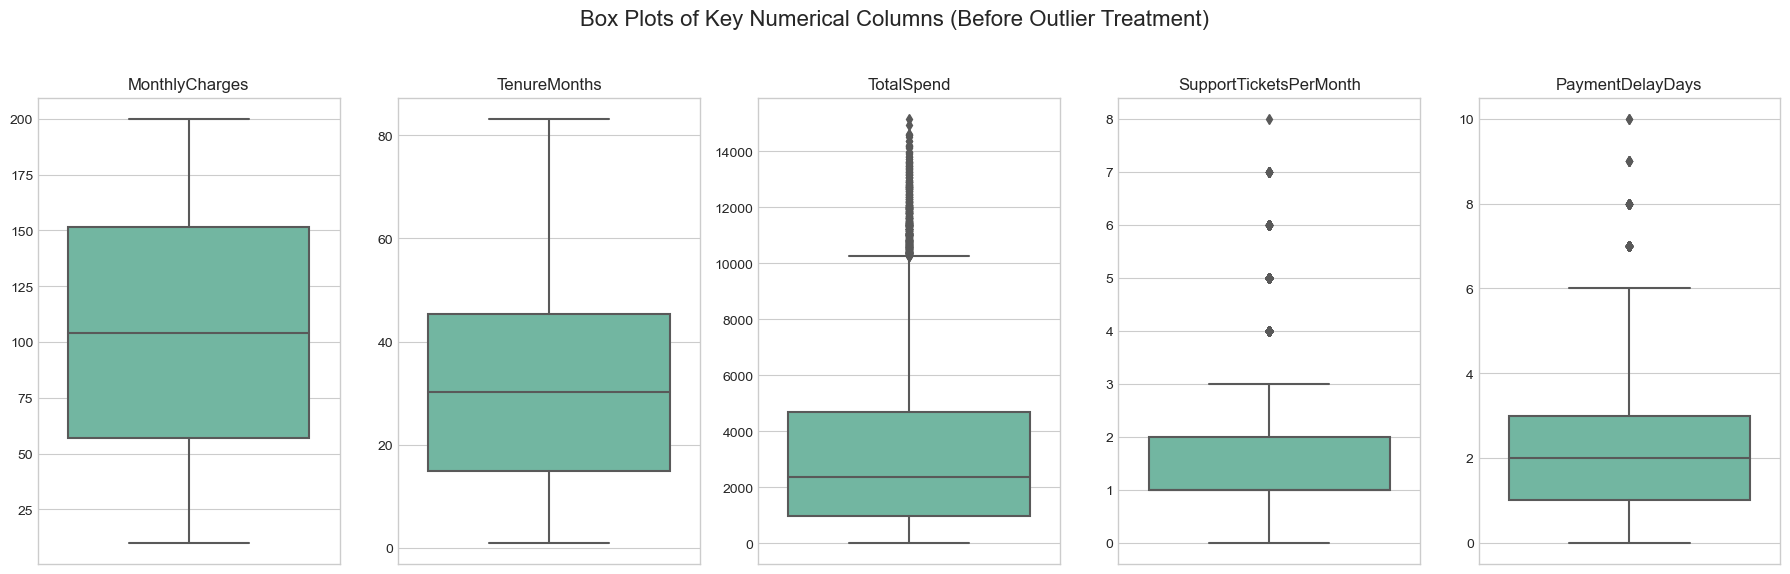

Outliers in 'MonthlyCharges' have been capped at a lower bound of -84.75 and an upper bound of 293.25.
Outliers in 'TenureMonths' have been capped at a lower bound of -30.60 and an upper bound of 91.00.
Outliers in 'TotalSpend' have been capped at a lower bound of -4593.42 and an upper bound of 10254.38.
Outliers in 'SupportTicketsPerMonth' have been capped at a lower bound of -0.50 and an upper bound of 3.50.
Outliers in 'PaymentDelayDays' have been capped at a lower bound of -2.00 and an upper bound of 6.00.


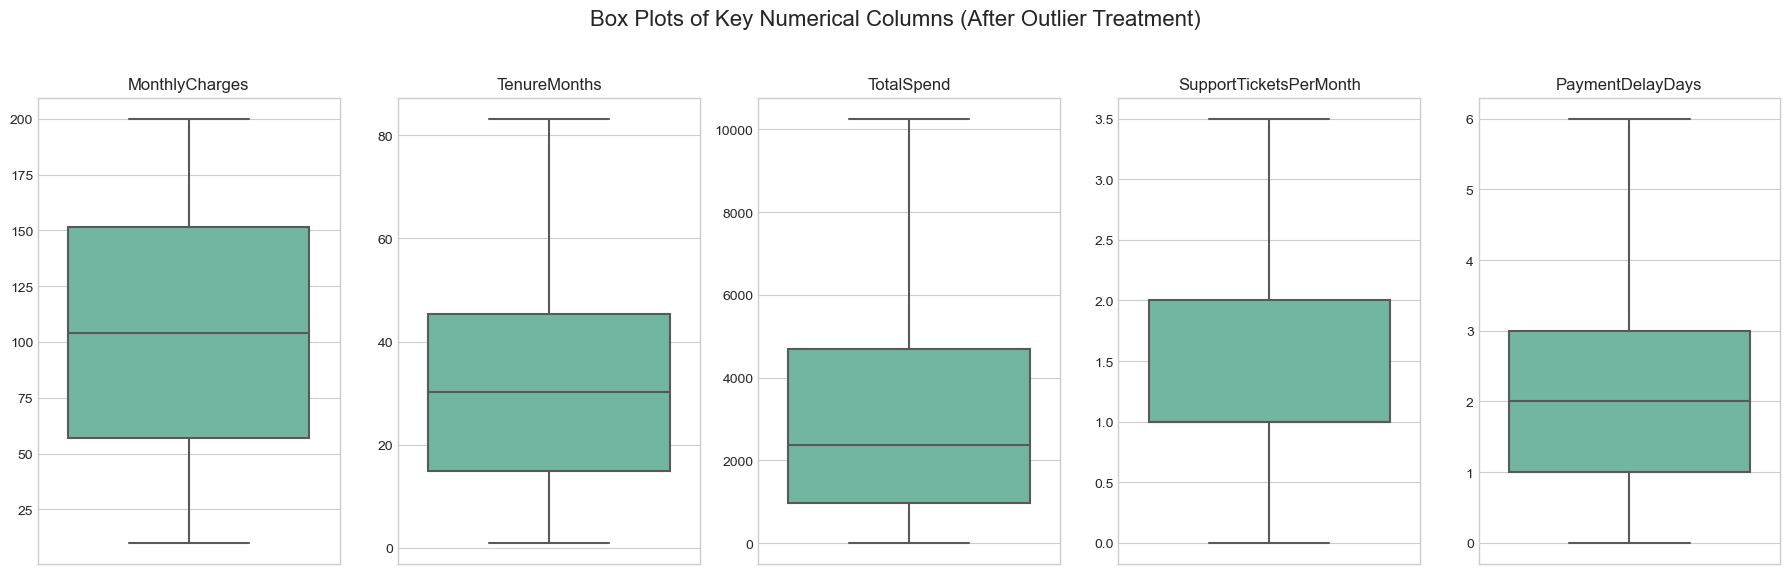


Outlier treatment complete. The dataset is now ready for modeling.


In [9]:
# --- Step 1: Visualize Outliers (Before Treatment) ---
numerical_cols = ['MonthlyCharges', 'TenureMonths', 'TotalSpend','SupportTicketsPerMonth','PaymentDelayDays']

# Use the updated style name
plt.style.use('seaborn-whitegrid')
fig, axes = plt.subplots(1, len(numerical_cols), figsize=(18, 6))
fig.suptitle('Box Plots of Key Numerical Columns (Before Outlier Treatment)', fontsize=16)

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], ax=axes[i], palette='Set2')
    axes[i].set_title(col)
    axes[i].set_ylabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# --- Step 2: Handle Outliers using the IQR Method ---

def cap_outliers_iqr(df, column):
    """
    Handles outliers in a specified column of a DataFrame using the IQR method.
    Outliers are capped at the upper and lower bounds.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap the values
    df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else x)
    df[column] = df[column].apply(lambda x: upper_bound if x > upper_bound else x)
    
    print(f"Outliers in '{column}' have been capped at a lower bound of {lower_bound:.2f} and an upper bound of {upper_bound:.2f}.")
    
    return df

# Apply the outlier capping to the numerical columns
for col in numerical_cols:
    df = cap_outliers_iqr(df, col)

# --- Step 3: Visualize Outliers (After Treatment) ---

fig, axes = plt.subplots(1, len(numerical_cols), figsize=(18, 6))
fig.suptitle('Box Plots of Key Numerical Columns (After Outlier Treatment)', fontsize=16)

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], ax=axes[i], palette='Set2')
    axes[i].set_title(col)
    axes[i].set_ylabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

print("\nOutlier treatment complete. The dataset is now ready for modeling.")

In [10]:
df.describe()

,Age,AutoRenew,TenureMonths,MonthlyCharges,Upgrades,Downgrades,IsPromoEligible,LoginsLast30d,SessionsPerUserLastMonth,ActiveDaysLastMonth,LastLoginDaysAgo,UsageTrend3m_Hours,AvgMonthlyUsageHours,SupportTicketsPerMonth,NPS,PaymentDelayDays,FailedPayments_12m,TotalSpend,Churn,MonthlyCharges_USD,TotalSpend_USD
count,20000.00000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,43.52910,0.753550,30.467500,104.481580,0.60165,0.398400,0.351550,20.420950,4.987645,19.323450,20.656150,99.267190,82.975075,1.44235,5.455100,2.404350,1.191600,3140.182014,0.300000,86.278460,2619.59439
std,14.96466,0.430954,18.064249,54.892807,0.77743,0.635923,0.477466,5.257274,2.886251,6.565842,13.771961,57.750928,57.827831,1.09593,2.871602,1.449881,1.097702,2652.080892,0.458269,68.754299,2922.52550
min,18.00000,0.000000,1.000000,10.000000,0.00000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,9.400000,0.000000,0.100000,0.10000
25%,31.00000,1.000000,15.000000,57.000000,0.00000,0.000000,0.000000,17.000000,2.500000,15.000000,10.000000,49.200000,34.400000,1.00000,3.000000,1.000000,0.000000,974.500000,0.000000,21.600000,271.02500
50%,43.00000,1.000000,30.200000,103.800000,0.00000,0.000000,0.000000,20.000000,5.000000,19.000000,20.000000,99.300000,69.800000,1.00000,5.000000,2.000000,1.000000,2375.350000,0.000000,80.200000,1593.60000
75%,57.00000,1.000000,45.400000,151.500000,1.00000,1.000000,1.000000,24.000000,7.500000,24.000000,30.000000,149.400000,129.000000,2.00000,8.000000,3.000000,2.000000,4686.450000,1.000000,138.000000,4033.02500
max,69.00000,1.000000,83.200000,200.000000,5.00000,4.000000,1.000000,44.000000,10.000000,30.000000,89.000000,200.000000,208.000000,3.50000,10.000000,6.000000,8.000000,10254.375000,1.000000,253.900000,18242.40000


In [11]:

#df["SupportTicketsPerMonth"] = df["SupportTicketsPerMonth"] / (df["TenureMonths"]+1)
df["AvgTimeBetweenLogins"] = df["LastLoginDaysAgo"] / (df["LoginsLast30d"]+1)
df["AvgRevnPerUser"] = df["TotalSpend_USD"] / (df["TenureMonths"] + 1)


X = df.drop(columns=["CustomerID", "Churn", "Country","TenureMonths","TotalSpend","MonthlyCharges","MonthlyCharges_USD","TotalSpend_USD"])
y = df["Churn"]

from sklearn.preprocessing import LabelEncoder
cat_cols = X.select_dtypes(include="object").columns
print(cat_cols)
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

X.head(10)


Index(['Gender', 'Plan', 'ContractType', 'PeakUsageTimeOfDay'], dtype='object')


,Gender,Age,Plan,ContractType,AutoRenew,Upgrades,Downgrades,IsPromoEligible,LoginsLast30d,SessionsPerUserLastMonth,PeakUsageTimeOfDay,ActiveDaysLastMonth,LastLoginDaysAgo,UsageTrend3m_Hours,AvgMonthlyUsageHours,SupportTicketsPerMonth,NPS,PaymentDelayDays,FailedPayments_12m,AvgTimeBetweenLogins,AvgRevnPerUser
0,1,39,2,2,1,0,0,0,19,8.0,0,19,15,9.6,147.4,2.0,6,5.0,2,0.750000,149.922078
1,0,19,2,1,1,1,0,1,19,4.2,1,11,32,7.5,142.6,0.0,7,1.0,0,1.600000,96.784741
2,1,21,0,1,1,1,0,1,30,2.5,3,7,23,13.3,10.0,0.0,1,5.0,2,0.741935,0.470588
3,1,62,2,1,1,0,0,1,19,5.8,3,15,26,99.2,24.1,0.0,2,3.0,3,1.300000,1.672093
4,1,30,2,2,1,0,0,1,18,1.6,0,16,27,114.3,18.5,3.0,4,1.0,0,1.421053,224.858527
5,0,49,0,2,1,0,0,0,30,0.5,0,11,43,52.9,87.5,2.0,9,3.0,3,1.387097,58.108108
6,1,39,2,1,1,0,0,1,24,7.2,2,15,42,109.6,34.1,1.0,8,6.0,0,1.680000,1.163043
7,1,42,0,1,0,0,1,1,19,8.4,1,8,20,49.2,1.0,2.0,8,2.0,4,1.000000,383.481481
8,1,44,0,2,0,0,0,0,22,8.5,3,30,0,172.1,76.8,1.0,3,0.0,3,0.000000,122.331210
9,0,34,0,1,1,1,0,0,14,9.9,0,20,18,78.4,191.8,1.0,2,2.0,0,1.200000,22.578947


In [12]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import shap
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

X_test_copy = X_test


print(f"Original training dataset shape: {Counter(y_train)}")

# Step 1: Apply SMOTE to the training data to handle class imbalance
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print(f"Resampled training dataset shape: {Counter(y_train_res)}")
# Print shapes after resampling
print("--- Shapes AFTER SMOTE ---")
print(f"X_train_res shape: {X_train_res.shape}")
print(f"y_train_res distribution: {Counter(y_train_res)}")
print(f"X_test shape (unchanged): {X_test.shape}")
print(f"y_test distribution (unchanged): {Counter(y_test)}")



scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models + params
param_grids = {
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=2000),
        "params": {"C": [0.01, 0.1, 1, 10], "penalty": ["l2"], "solver": ["lbfgs"]}
    },
    "Decision Tree": {
        "model": DecisionTreeClassifier(),
        "params": {"max_depth": [3, 5, 10, None], "min_samples_split": [2, 5, 10]}
    },
    "Random Forest": {
        "model": RandomForestClassifier(),
        "params": {"n_estimators": [100, 200], "max_depth": [5, 10, None]}
    },
    "Extra Trees": {
        "model": ExtraTreesClassifier(),
        "params": {"n_estimators": [100, 200], "max_depth": [5, 10, None]}
    },
    "Gradient Boosting": {
        "model": GradientBoostingClassifier(),
        "params": {"n_estimators": [100, 200], "learning_rate": [0.01, 0.1], "max_depth": [3, 5]}
    },
    "AdaBoost": {
        "model": AdaBoostClassifier(),
        "params": {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 1.0]}
    },
    "XGBoost": {
        "model": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
        "params": {"n_estimators": [100, 200], "learning_rate": [0.01, 0.1, 0.3], "max_depth": [3, 5, 7]}
    },
    "LightGBM": {
        "model": LGBMClassifier(),
        "params": {"n_estimators": [100, 200], "learning_rate": [0.01, 0.1, 0.3], "max_depth": [-1, 5, 7]}
    },
    "KNN": {
        "model": KNeighborsClassifier(),
        "params": {"n_neighbors": [3, 5, 7, 11]}
    }
}


Original training dataset shape: Counter({0: 11200, 1: 4800})
Resampled training dataset shape: Counter({0: 11200, 1: 11200})
--- Shapes AFTER SMOTE ---
X_train_res shape: (22400, 21)
y_train_res distribution: Counter({0: 11200, 1: 11200})
X_test shape (unchanged): (4000, 21)
y_test distribution (unchanged): Counter({0: 2800, 1: 1200})


In [13]:
results = []
best_models = {}

for name, mp in param_grids.items():
    grid = GridSearchCV(mp["model"], mp["params"], scoring="f1", cv=3, n_jobs=-1)
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    best_models[name] = best_model
    
    y_pred = best_model.predict(X_test)
    y_prob = best_model.predict_proba(X_test)[:,1]
    
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    
    results.append([name, grid.best_params_, acc, f1, auc])
    print(f"\n{name} Report\n", classification_report(y_test, y_pred))





Logistic Regression Report
               precision    recall  f1-score   support

           0       0.83      0.88      0.85      2800
           1       0.67      0.57      0.62      1200

    accuracy                           0.79      4000
   macro avg       0.75      0.73      0.73      4000
weighted avg       0.78      0.79      0.78      4000


Decision Tree Report
               precision    recall  f1-score   support

           0       0.85      0.92      0.88      2800
           1       0.77      0.62      0.69      1200

    accuracy                           0.83      4000
   macro avg       0.81      0.77      0.79      4000
weighted avg       0.83      0.83      0.83      4000


Random Forest Report
               precision    recall  f1-score   support

           0       0.87      0.92      0.89      2800
           1       0.78      0.67      0.72      1200

    accuracy                           0.84      4000
   macro avg       0.82      0.79      0.80      4000

In [14]:
results_df = pd.DataFrame(results, columns=["Model", "Best Params", "Accuracy", "F1 Score", "ROC-AUC"])
results_df = results_df.sort_values(by=["F1 Score", "ROC-AUC"], ascending=False)
pd.set_option('display.max_colwidth', None)
results_df

,Model,Best Params,Accuracy,F1 Score,ROC-AUC
7,LightGBM,"{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}",0.84900,0.732032,0.919429
4,Gradient Boosting,"{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}",0.84925,0.728989,0.920197
6,XGBoost,"{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}",0.84675,0.726949,0.919860
2,Random Forest,"{'max_depth': None, 'n_estimators': 200}",0.84300,0.718386,0.914689
5,AdaBoost,"{'learning_rate': 1.0, 'n_estimators': 50}",0.84200,0.709826,0.917418
1,Decision Tree,"{'max_depth': 5, 'min_samples_split': 2}",0.83175,0.690290,0.904514
3,Extra Trees,"{'max_depth': None, 'n_estimators': 200}",0.83225,0.670270,0.908362
0,Logistic Regression,"{'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}",0.78700,0.616906,0.865193
8,KNN,{'n_neighbors': 3},0.74700,0.518095,0.743586


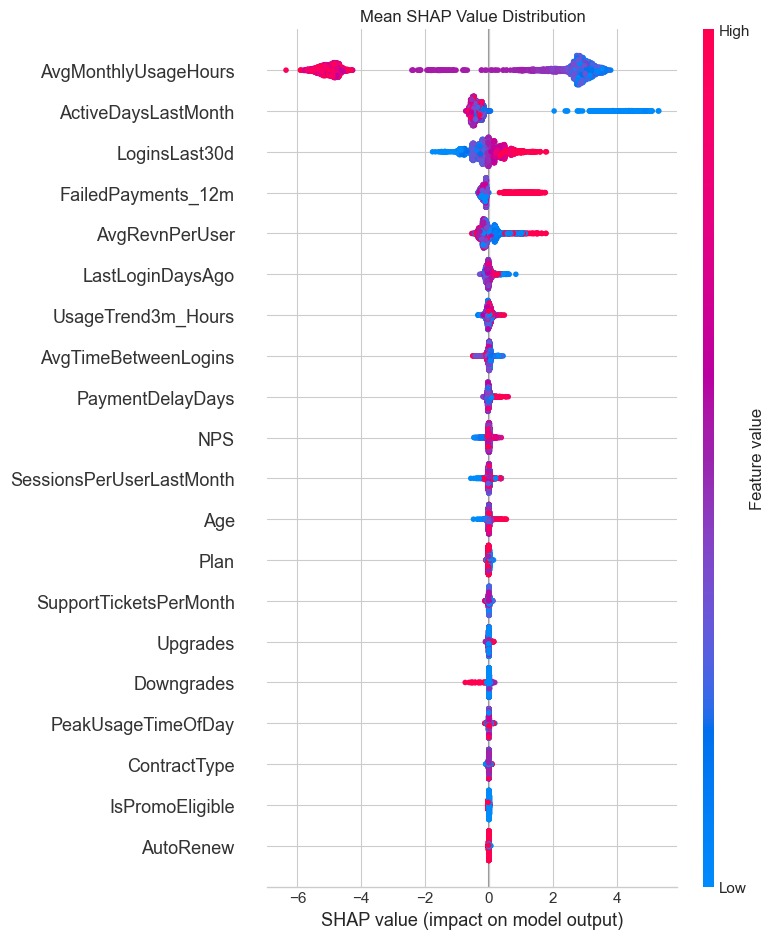

<Figure size 1200x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

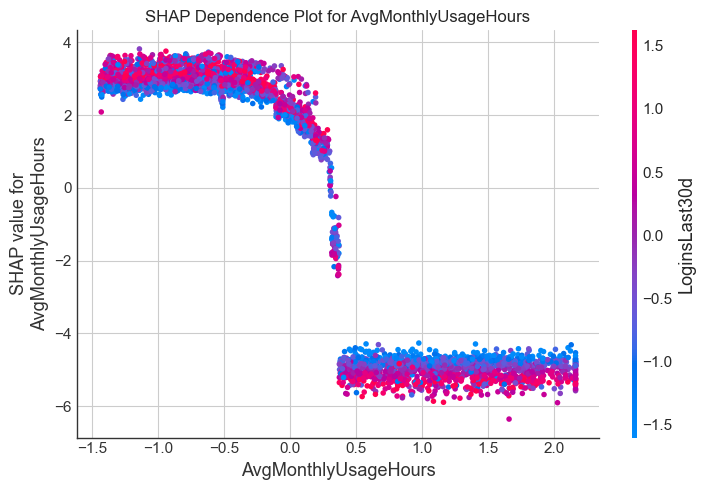

In [15]:
import shap
import matplotlib.pyplot as plt
import numpy as np

# Set the matplotlib backend to inline for proper display
%matplotlib inline

# Initialize SHAP explainer with the best model
best_model = best_models["LightGBM"]
explainer = shap.TreeExplainer(best_model)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test)

# Handle different SHAP return formats
if isinstance(shap_values, list):
    shap_values = shap_values[1]  # Use values for positive class (churn)

# Get base value - handle both scalar and array cases
if hasattr(explainer.expected_value, '__len__') and len(explainer.expected_value) > 1:
    base_value = explainer.expected_value[1]  # Use base value for positive class
else:
    base_value = explainer.expected_value  # Single value

# 2. Mean SHAP Value Plot (Beeswarm Plot)
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_test, feature_names=X.columns, show=False)
plt.title("Mean SHAP Value Distribution")
plt.tight_layout()
plt.savefig('mean_shap_values.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. Waterfall Plot for a Specific Instance
# Select an instance to explain
instance_idx = 0  # First test instance

# Create an Explanation object for the waterfall plot
explanation = shap.Explanation(
    values=shap_values[instance_idx],
    base_values=base_value,
    data=X_test[instance_idx],
    feature_names=X.columns
)

plt.figure(figsize=(12, 8))


# 4. Dependence Plot for the Most Important Feature
# Find the most important feature
feature_importance = np.abs(shap_values).mean(0)
most_important_feature = X.columns[np.argmax(feature_importance)]

plt.figure(figsize=(10, 8))
shap.dependence_plot(most_important_feature, shap_values, X_test, feature_names=X.columns, show=False)
plt.title(f"SHAP Dependence Plot for {most_important_feature}")
plt.tight_layout()
plt.savefig('dependence_plot.png', dpi=300, bbox_inches='tight')
plt.show()

In [16]:
import pandas as pd
import numpy as np
import shap

def explain_customer_simple(idx, threshold=0.5):
    # Scale features
    X_scaled = scaler.transform(X)

    # Prediction & actual label
    prob = best_model.predict_proba([X_scaled[idx]])[0, 1]
    prediction = "Churn" if prob > threshold else "Not Churn"
    actual = "Churn" if y.iloc[idx] == 1 else "Not Churn"

    # SHAP values
    shap_values = explainer.shap_values(X_scaled)
    contribs = shap_values[idx]

    # Combine feature, value, contribution
    details = list(zip(X.columns, X_scaled[idx], contribs))
    details.sort(key=lambda x: abs(x[2]), reverse=True)

    # --- Print Results ---
    print("="*50)
    cid = df.iloc[idx].get("CustomerID", "N/A") if "CustomerID" in df.columns else "N/A"
    print(f"Customer ID: {cid}")
    print(f"Prediction: {prediction} | Actual: {actual}\n")

    print("Top 5 Factors:")
    for i, (f, v, c) in enumerate(details[:5], 1):
        arrow = "↑ Increases churn" if c > 0 else "↓ Decreases churn"
        print(f"{i}. {f} = {v:.2f} ({arrow}, impact {abs(c):.3f})")

    # Insights
    print("\nInsights:")
    for f, v, c in details[:3]:
        action = "Reduce risk" if c > 0 else "Maintain strength"
        print(f"- {action} in {f} (current: {v:.2f})")
    print("="*50)

    # SHAP Waterfall plot
    explanation = shap.Explanation(
        values=contribs,
        base_values=explainer.expected_value,
        data=X_scaled[idx],
        feature_names=X.columns
    )
    shap.plots.waterfall(explanation, max_display=10)


In [17]:
X_test_copy.head(10)

,Gender,Age,Plan,ContractType,AutoRenew,Upgrades,Downgrades,IsPromoEligible,LoginsLast30d,SessionsPerUserLastMonth,PeakUsageTimeOfDay,ActiveDaysLastMonth,LastLoginDaysAgo,UsageTrend3m_Hours,AvgMonthlyUsageHours,SupportTicketsPerMonth,NPS,PaymentDelayDays,FailedPayments_12m,AvgTimeBetweenLogins,AvgRevnPerUser
9449,0,51,2,0,1,1,0,1,22,5.2,2,10,18,141.7,18.6,3.0,7,1.0,1,0.782609,98.166979
16654,0,21,1,2,1,1,0,0,19,7.1,3,17,15,123.7,2.2,1.0,9,3.0,0,0.750000,128.686591
9351,0,56,0,2,1,0,1,0,20,6.3,3,12,19,102.6,47.8,0.0,5,1.0,2,0.904762,2.333333
2573,1,66,2,1,1,1,0,1,13,8.5,0,6,10,5.6,81.5,1.0,5,4.0,1,0.714286,133.455017
8158,1,56,0,1,1,0,0,0,21,7.7,3,17,17,135.0,77.0,3.0,2,2.0,1,0.772727,46.583090
456,0,42,0,1,1,0,1,1,19,5.1,2,22,32,14.2,162.6,3.0,2,3.0,1,1.600000,55.347079
15681,1,57,1,2,1,0,1,0,18,2.7,2,24,7,123.3,176.2,1.0,8,0.0,1,0.368421,63.470588
19841,1,68,1,1,1,1,0,1,18,0.9,0,17,14,136.0,8.8,2.0,3,2.0,1,0.736842,8.944882
11957,1,26,0,0,1,1,0,0,27,1.1,3,25,16,163.1,129.4,3.5,1,2.0,1,0.571429,84.818725
6903,1,46,0,1,0,1,1,0,25,7.3,0,11,17,198.3,144.0,3.0,2,2.0,0,0.653846,87.386792


Customer ID: C09451
Prediction: Churn | Actual: Churn

Top 5 Factors:
1. AvgMonthlyUsageHours = -0.45 (↑ Increases churn, impact 2.938)
2. LoginsLast30d = 0.67 (↑ Increases churn, impact 0.493)
3. ActiveDaysLastMonth = 0.11 (↓ Decreases churn, impact 0.482)
4. AvgRevnPerUser = -0.50 (↑ Increases churn, impact 0.200)
5. FailedPayments_12m = -0.17 (↓ Decreases churn, impact 0.162)

Insights:
- Reduce risk in AvgMonthlyUsageHours (current: -0.45)
- Reduce risk in LoginsLast30d (current: 0.67)
- Maintain strength in ActiveDaysLastMonth (current: 0.11)


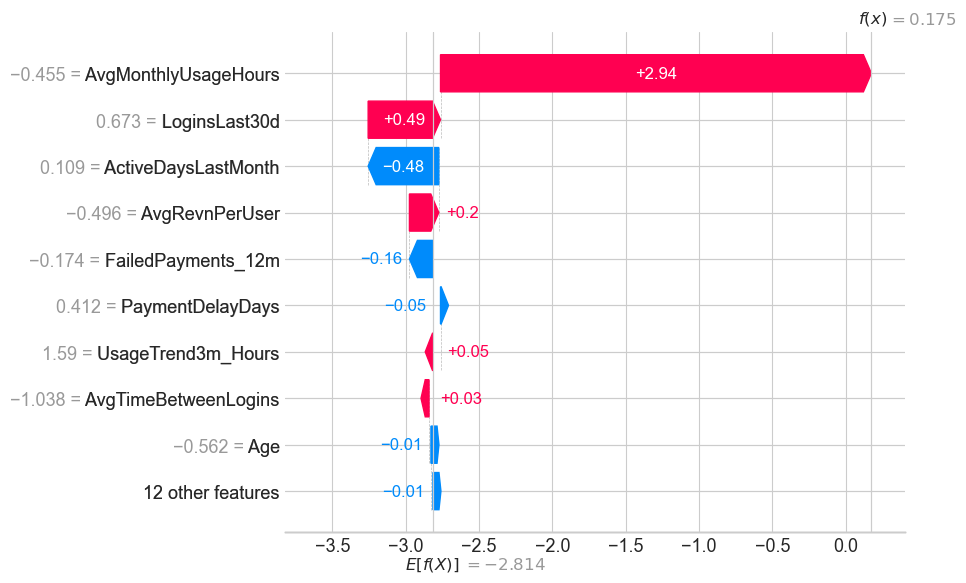

In [18]:
explain_customer_simple(9450)

In [19]:
import joblib

joblib.dump(best_model, r"C:\Users\mrahu\Desktop\customer_churn_model.joblib")
print("Best model saved as customer_churn_model.pkl")


Best model saved as customer_churn_model.pkl


In [20]:
!pip install seaborn